In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load the Iris dataset
from sklearn.datasets import load_iris

data = load_iris()

# Convert to DataFrame for easier handling
df = pd.DataFrame(data.data, columns=data.feature_names)
df["species"] = pd.Categorical.from_codes(data.target, data.target_names)

# Extract the 'petal length (cm)' feature
petal_lengths = df["petal length (cm)"]

# Compute mean and standard deviation of petal length
mean = np.mean(petal_lengths)
std = np.std(petal_lengths)

print(f"Mean petal length: {mean:.2f}, Std dev: {std:.2f}")

Mean petal length: 3.76, Std dev: 1.76


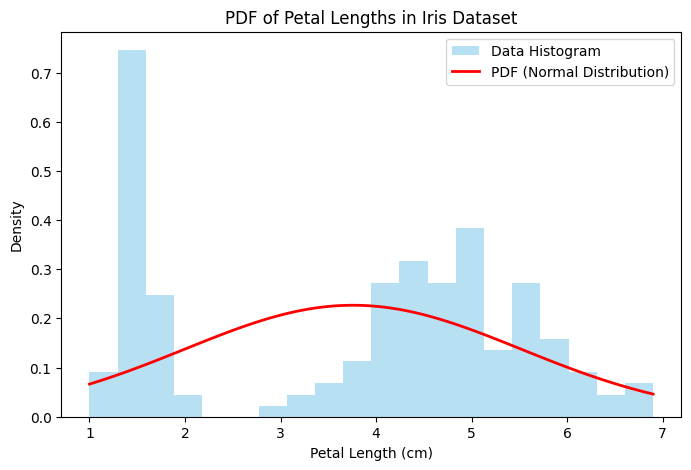

In [17]:
# Generate points along the x-axis
x = np.linspace(petal_lengths.min(), petal_lengths.max(), 100)

# Calculate the PDF of the normal distribution at each point
pdf = norm.pdf(x, mean, std)

# Plot the PDF
plt.figure(figsize=(8, 5))
plt.hist(
    petal_lengths,
    bins=20,
    density=True,
    alpha=0.6,
    color="skyblue",
    label="Data Histogram",
)
plt.plot(x, pdf, "r-", lw=2, label="PDF (Normal Distribution)")
plt.title("PDF of Petal Lengths in Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Density")
plt.legend()
plt.show()

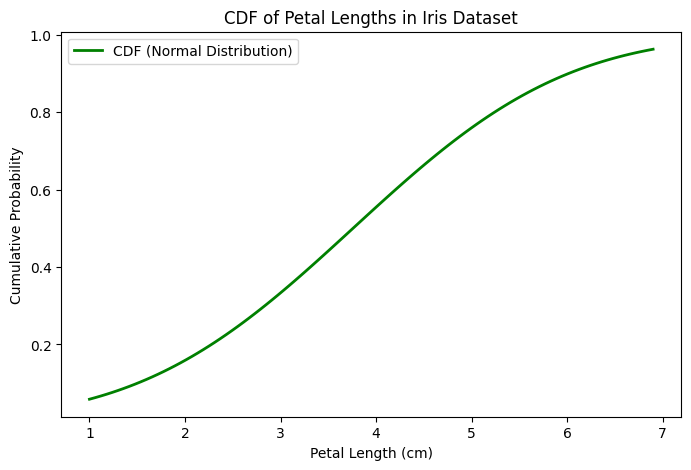

In [18]:
# Calculate the CDF of petal lengths
cdf = norm.cdf(x, mean, std)

# Plot the CDF
plt.figure(figsize=(8, 5))
plt.plot(x, cdf, "g-", lw=2, label="CDF (Normal Distribution)")
plt.title("CDF of Petal Lengths in Iris Dataset")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

In [19]:
# Calculate the probability that petal length <= 5 cm
prob = norm.cdf(5, mean, std)
print(f"Probability that petal length ≤ 5 cm: {prob * 100:.2f}%")

Probability that petal length ≤ 5 cm: 75.99%


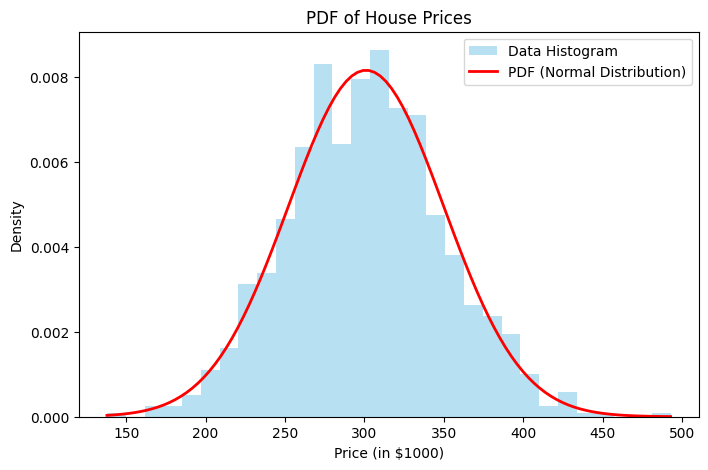

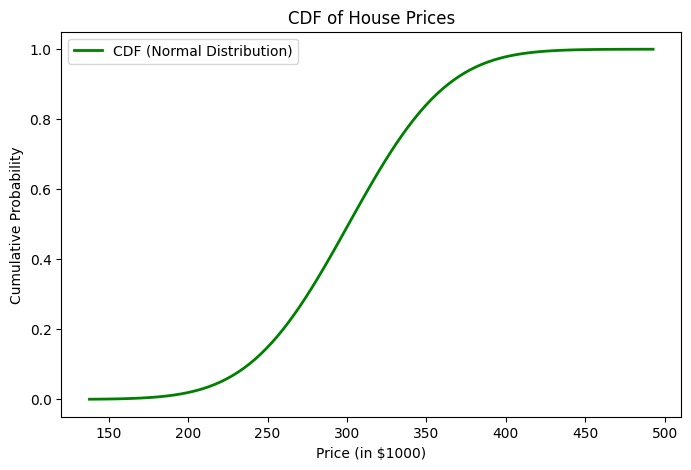

In [20]:
# Simulated house price data (in thousands of dollars)
np.random.seed(42)  # For reproducibility
house_prices = np.random.normal(300, 50, 1000)  # Mean=300, Std=50, n=1000

# Plot the PDF
plt.figure(figsize=(8, 5))
x = np.linspace(house_prices.min(), house_prices.max(), 100)
pdf = norm.pdf(x, np.mean(house_prices), np.std(house_prices))

plt.hist(
    house_prices,
    bins=30,
    density=True,
    alpha=0.6,
    color="skyblue",
    label="Data Histogram",
)
plt.plot(x, pdf, "r-", lw=2, label="PDF (Normal Distribution)")
plt.title("PDF of House Prices")
plt.xlabel("Price (in $1000)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plot the CDF
cdf = norm.cdf(x, np.mean(house_prices), np.std(house_prices))

plt.figure(figsize=(8, 5))
plt.plot(x, cdf, "g-", lw=2, label="CDF (Normal Distribution)")
plt.title("CDF of House Prices")
plt.xlabel("Price (in $1000)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()

In [21]:
tryy = [petal_lengths]
tryy

[0      1.4
 1      1.4
 2      1.3
 3      1.5
 4      1.4
       ... 
 145    5.2
 146    5.0
 147    5.2
 148    5.4
 149    5.1
 Name: petal length (cm), Length: 150, dtype: float64]

In [22]:
import plotly.figure_factory as ff

group_labels = ["distplot"]  # name of the dataset

fig = ff.create_distplot(tryy, group_labels)
fig.show()

In [24]:
petal_lengths = [df[df["species"] == "setosa"]["petal length (cm)"]]
group_labels = ["Iris Setosa"]

fig = ff.create_distplot(petal_lengths, group_labels)
fig.show()

In [34]:
# Group data together
hist_data = []
group_labels = []
for i in df["species"].value_counts().index:
    hist_data.append(df[df["species"] == i]["petal length (cm)"])
    group_labels.append(i)

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.1)
fig.show()